# Exploratory Data Analysis - House Prices

## Importing libraries

In [15]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

## Loading data

In [25]:
if 'KAGGLE_KERNEL_RUN_TYPE' in os.environ:
    # Kaggle-specific configuration
    TEST_PATH = Path('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
    TRAIN_PATH = Path('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
else:
    # Local configuration
    TEST_PATH = Path('data/test.csv')
    TRAIN_PATH = Path('data/train.csv')

house_prices_test_df = pd.read_csv(TEST_PATH)
house_prices_train_df = pd.read_csv(TRAIN_PATH)

In [34]:
print('Full train dataset shape is {} rows and {} columns.'.format(house_prices_train_df.shape[0], house_prices_train_df.shape[1]))

Full train dataset shape is 1460 rows and 81 columns.


In [35]:
house_prices_train_df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


There are 81 columns, where:
- One column is `Id`, it will be dropped;
- `SalePrice` is the target column;
- All other 79 columns are features that will be possibly used in the model.

In [36]:
house_prices_train_df = house_prices_train_df.drop('Id', axis=1)
house_prices_train_df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [37]:
house_prices_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Target: Sales Price

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<Figure size 1000x700 with 0 Axes>

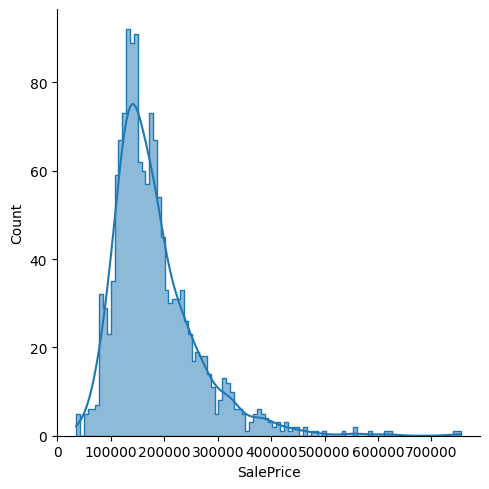

In [44]:
print(house_prices_train_df['SalePrice'].describe())
plt.figure(figsize=(10,7))
sns.displot(house_prices_train_df['SalePrice'], bins=100, kde=True, element='step');